# Support Vector Machines

This part of the workshop is dedicated to Support Vector Machines. The aims of this part are (i) to appreciate how the use of kernels results in non-linear decision boundaries, and (ii) to see how regularisation and kernel parameters affect this shape.

We start with same old initialisation line.

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Cats Dataset

This time we are going to use a real dataset that is not linearly separable. The dataset consists of 150 trainig examples with two attributes each. Each example corresponds to a cat and the two attributes are some physiological measurements for that cat. Along with the measuremnets, the sex of the cat is also recorded as a label. We encode sex using 1 for female cats and -1 for male cats.

*(This data was popularised by the following publication: Fisher, R.A. (1947) The analysis of covariance method for the relation between a part and the whole. Biometrics, 3, 65–68.)*

In [2]:
def load_cats_data():
    #np.savetxt('cats_gender.csv', d , delimiter=",")
    d= np.loadtxt('cats_gender.csv', delimiter=",")
    X = d[:,[0,1]]
    y = d[:,2]
    
    return X,y

This is what the data looks like (blue circles are male cats, red circles are female cats).

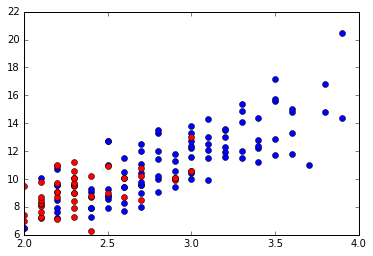

In [3]:
X,y = load_cats_data()
plt.plot(X[y==-1,0], X[y==-1,1], "bo")
plt.plot(X[y==1,0], X[y==1,1], "ro")

## SVM Decision Boundaries

We first do feature normalisation step i.e. re-scale each feature to have zero mean and unit variance. 
Note that both hard margin and soft margin variations have $||w||$ term. In this term each feature weight is treated equally, hence it is important that the features are indeed approximately on the same range.

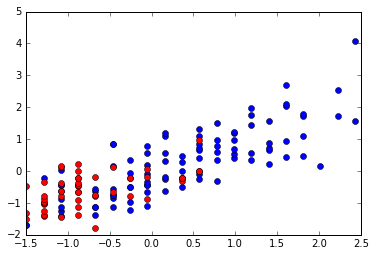

In [4]:
mean_r = np.mean(X, 0)
std_r = np.std(X, 0)
X_norm = ((X - mean_r) / std_r) 

plt.plot(X_norm[y==-1,0], X_norm[y==-1,1], "bo")
plt.plot(X_norm[y==1,0], X_norm[y==1,1], "ro")

Now, we will define an auxiliary function for plotting decision boundaries.

In [5]:
# X are training data instances, y are labels
# cls is a trained SVM classifier,
# and name is the title of the plot
def plot_boundary(X, y, cls, name):
    # create a mesh to plot in
    h = 0.02 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(arange(x_min, x_max, h),
                        arange(y_min, y_max, h))
    
    # plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # put the result into a color plot
    Z = Z.reshape(xx.shape)
    contourf(xx, yy, Z, cmap=cm.Paired, alpha=0.7)
    
    # plot also the training points
    #scatter(X[:, 0], X[:, 1], c=y*5, cmap=cm.Paired)
    plt.plot(X[y==-1,0], X[y==-1,1], "b.")
    plt.plot(X[y==1,0], X[y==1,1], "r.")
    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())
    title(name)

In the following exercises, you will be asked to experiment with various parameters. In all cases, you should pay attention to how these parameters control the degree of overfitting and try to explain the observed effect.

Now train soft margin SVM classifier with a linear kernel, which means that the original attributes are not transformed. Note that SVMs are called Support Vector Classifiers (SVCs) in this package. *Experiment with different values of $C$ and see how it affects the result.*

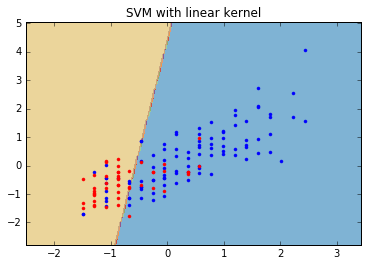

In [6]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C=5).fit(X_norm, y) # linear kernel, no feature transformation
plot_boundary(X_norm, y, svc, 'SVM with linear kernel')

This doesn't work well, because the data is not linearly separable. Now try a polynomial kernel to see if the shape of the decision boundary can be changed. *Experiment with different polynomial degrees.*

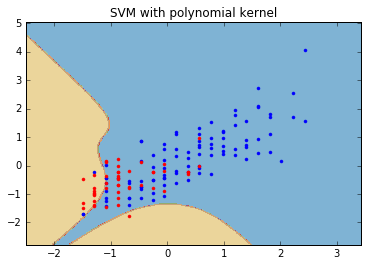

In [7]:
poly_svc = svm.SVC(kernel='poly', degree=5, C=5).fit(X_norm, y) # polynomial kernel
plot_boundary(X_norm, y, poly_svc, 'SVM with polynomial kernel')

Finally, let's explore the Gaussian kernel (aka RBF kernel). *Experiment with different standard deviations of the kernel.*

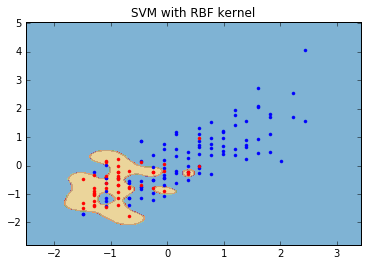

In [8]:
rbf_svc = svm.SVC(kernel='rbf', gamma=10, C=5).fit(X_norm, y) # Gaussian (aka RBF) kernel
plot_boundary(X_norm, y, rbf_svc, 'SVM with RBF kernel')

*Which kernel do you think works best for this data and why?*


Now, we will show the importance of re-scaling our features. Let's multiply one of the features by a large number, e.g., 10^4, and apply SVM (with any kernel). How do you interpret the result ?

(array([ 2. ,  6.3]), array([  3.9,  20.5]))
(array([  2.00000000e+04,   6.30000000e+00]), array([  3.90000000e+04,   2.05000000e+01]))


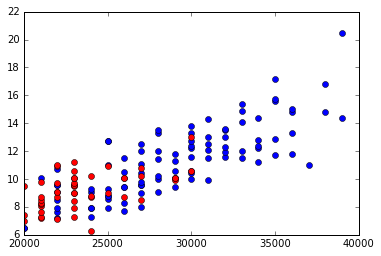

In [9]:
X1 = X.copy() 
X1[:,0] = X[:,0]* 10**4
print( np.min(X,axis=0),np.max(X,axis=0))

print( np.min(X1,axis=0),np.max(X1,axis=0))

plt.plot(X1[y==-1,0], X1[y==-1,1], "bo")
plt.plot(X1[y==1,0], X1[y==1,1], "ro")



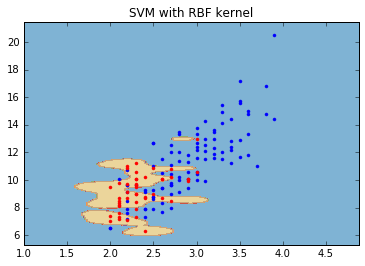

In [10]:
rbf_svc = svm.SVC(kernel='rbf', gamma=10, C=5).fit(X, y) # Gaussian (aka RBF) kernel
plot_boundary(X, y, rbf_svc, 'SVM with RBF kernel')